## Feature Extraction

In [21]:
import pandas as pd
from sklearn.cluster import KMeans


def process(df):
    # This is where you can do all your processing
    date_time = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

    df['trans_date'] = date_time.dt.date
    df['trans_time'] = date_time.dt.time
    df.drop(columns='trans_date_trans_time', inplace=True)

    dob_year = pd.to_datetime(df['dob'], format='%d/%m/%Y').dt.year
    trans_year = pd.to_datetime(df['trans_date']).dt.year
    df['age'] = trans_year - dob_year

    df.drop(columns='trans_num',inplace=True)
    df['category'] = df['category'].str.replace('"', '')
    df['online'] = df['category'].str.contains('_net').astype(int)

    typical_transaction_amount = df.groupby('cc_num')['amt'].median()
    df['median_trans_amt'] = df['cc_num'].map(typical_transaction_amount)
    df['hour'] = df['trans_time'].apply(lambda x: x.hour)
    df['minute'] = df['trans_time'].apply(lambda x: x.minute)
    X = df[['hour', 'minute']]

    # Initialize KMeans clustering with the desired number of clusters
    kmeans = KMeans(n_clusters=2, random_state=42)  #

    kmeans.fit(X)

    # Assign cluster labels to each data point
    df['time_cluster'] = kmeans.labels_
    return df



# Load the dataset
trainingSet = pd.read_csv("train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# # Load test set
submissionSet = pd.read_csv("test.csv")

# Merge on Id so that the test set can have feature columns as well
MainTrain = train_processed

In [22]:
# Load the dataset
trainingSet = pd.read_csv("train.csv")

trainingSet


,Id,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,205743,01/09/2020 08:22,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,...,29.9912,-90.2479,68211,"Engineer, petroleum",23/04/1941,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0
1,465349,12/12/2020 07:42,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,...,40.7692,-103.0968,648,Community arts worker,21/09/1969,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0
2,17312,27/06/2020 13:03,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,...,29.3641,-98.4924,1595797,Land,17/10/1995,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0
3,234968,14/09/2020 04:12,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,...,30.7906,-81.5607,1293,Naval architect,11/09/1963,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0
4,194255,28/08/2020 17:40,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,...,32.9413,-81.1807,1725,Social researcher,05/12/1974,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,518797,23/12/2020 09:46,3.534330e+15,"fraud_Douglas, Schneider and Turner",shopping_pos,136.87,Jeffrey,Smith,M,713 Scott Pike Apt. 712,...,45.2857,-108.9082,1446,Chartered loss adjuster,15/01/1978,f22ec69f2a872d05128f26dfb72ad94c,1387792013,44.407510,-108.189002,NaN
555715,429820,04/12/2020 09:41,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,39.83,Kimberly,Miller,F,75533 Tamara Valleys,...,37.9943,-88.9417,324,"Scientist, research (physical sciences)",15/06/1976,3bcc1af8bcfe2aa0c61aacee5a92b31b,1386150068,38.582503,-88.479525,NaN
555716,356090,06/11/2020 07:12,3.533800e+15,"fraud_Moen, Reinger and Murphy",grocery_pos,140.49,Amber,Thornton,F,840 Werner Lock Apt. 852,...,40.2967,-98.7370,493,"Surveyor, minerals",13/09/1940,72f5b24ad9e882cc034186c9ed49b691,1383721926,40.276547,-98.209641,NaN
555717,107848,28/07/2020 14:11,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,21.43,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,...,33.9143,-118.3493,93193,"Editor, magazine features",19/04/1995,96889bea22c0811a951b3a16e4d213eb,1375020660,33.097685,-117.464408,NaN


In [23]:
# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
submissionSet = pd.read_csv("test.csv")

# Merge on Id so that the test set can have feature columns as well
MainTrain = train_processed

In [24]:
MainTrain

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_date,trans_time,age,online,median_trans_amt,hour,minute,time_cluster
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,-90.080958,0.0,2020-09-01,08:22:00,79,0,50.090,8,22,0
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,-103.457961,0.0,2020-12-12,07:42:00,51,0,41.515,7,42,1
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,-98.491336,0.0,2020-06-27,13:03:00,25,0,17.920,13,3,0
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,-82.002506,0.0,2020-09-14,04:12:00,57,0,44.190,4,12,0
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,-80.201090,0.0,2020-08-28,17:40:00,46,1,35.360,17,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,518797,3.534330e+15,"fraud_Douglas, Schneider and Turner",shopping_pos,136.87,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,...,-108.189002,NaN,2020-12-23,09:46:00,42,0,77.340,9,46,1
555715,429820,4.951650e+15,"fraud_Rutherford, Homenick and Bergstrom",grocery_net,39.83,Kimberly,Miller,F,75533 Tamara Valleys,Logan,...,-88.479525,NaN,2020-12-04,09:41:00,44,1,31.670,9,41,1
555716,356090,3.533800e+15,"fraud_Moen, Reinger and Murphy",grocery_pos,140.49,Amber,Thornton,F,840 Werner Lock Apt. 852,Campbell,...,-98.209641,NaN,2020-11-06,07:12:00,80,0,38.790,7,12,0
555717,107848,4.683520e+15,"fraud_Bradtke, Torp and Bahringer",personal_care,21.43,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,Hawthorne,...,-117.464408,NaN,2020-07-28,14:11:00,25,0,34.420,14,11,0


In [25]:
from math import radians, sin, cos, sqrt, atan2
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np


label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
label_encoder5 = preprocessing.LabelEncoder()

MainTrain['category']= label_encoder1.fit_transform(MainTrain['category'])
MainTrain['merchant']= label_encoder2.fit_transform(MainTrain['merchant'])
MainTrain['state']= label_encoder3.fit_transform(MainTrain['state'])
MainTrain['job']= label_encoder4.fit_transform(MainTrain['job'])
MainTrain['gender'] = label_encoder4.fit_transform(MainTrain['gender'])



coordinates = np.column_stack((MainTrain['lat'].values, MainTrain['long'].values))

dbscan = DBSCAN(eps=0.04, min_samples=100)
clusters = dbscan.fit_predict(coordinates)

# Create a new column 'cluster_label' in the DataFrame
clusters[clusters == -1] = 0
MainTrain['region'] = None

# Assign cluster labels to the corresponding rows
for i, label in enumerate(clusters):
    MainTrain.at[MainTrain.index[i], 'region'] = label

def global_dist_formula(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of earth in kilometers
    return distance

def calculate_distance(row):
    home_lat = row['lat']
    home_lon = row['long']
    merch_lat = row['merch_lat']
    merch_lon = row['merch_long']
    return global_dist_formula(home_lat, home_lon, merch_lat, merch_lon)

MainTrain['dist_merch_home'] = MainTrain.apply(calculate_distance, axis=1)


In [26]:
mainTest = pd.merge(MainTrain, submissionSet, left_on='Id', right_on='Id')
mainTest = mainTest.drop(columns=['is_fraud_x'])
mainTest = mainTest.rename(columns={'is_fraud_y': 'is_fraud'})

MainTrain =  MainTrain[MainTrain['is_fraud'].notnull()]


string_cols = ['cc_num','category','job','state','merchant', 'gender', 'time_cluster','online']

numerals = ['amt','median_trans_amt','city_pop','age','dist_merch_home','region']



cols_final = ['Id']+string_cols+numerals+['is_fraud']

print(MainTrain.columns)

mainTest = mainTest[cols_final]
MainTrain = MainTrain[cols_final]

Index(['Id', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'age', 'online', 'median_trans_amt', 'hour',
       'minute', 'time_cluster', 'region', 'dist_merch_home'],
      dtype='object')


In [27]:
mainTest.to_csv("X_test.csv", index=False)
MainTrain.to_csv("X_train.csv", index=False)

In [28]:
MainTrain.head(10)

,Id,cc_num,category,job,state,merchant,gender,time_cluster,online,amt,median_trans_amt,city_pop,age,dist_merch_home,region,is_fraud
0,205743,5.596350e+15,2,163,17,43,1,0,0,72.18,50.090,68211,79,50.737315,0,0.0
1,465349,4.311370e+18,2,92,5,153,1,1,0,36.66,41.515,648,51,104.392466,1,0.0
2,17312,2.264940e+15,13,248,42,9,1,0,0,1.74,17.920,1595797,25,100.963045,2,0.0
3,234968,2.224100e+15,4,296,9,572,0,0,0,140.99,44.190,1293,57,69.869598,3,0.0
4,194255,3.527540e+15,11,410,39,189,0,1,1,1722.19,35.360,1725,46,92.423012,4,0.0
5,250314,3.501510e+15,6,352,8,187,1,0,0,34.08,40.545,276002,41,60.173625,5,0.0
6,491809,3.027300e+13,0,57,2,547,1,0,0,50.20,56.605,111,20,104.153115,6,0.0
7,81552,2.305340e+15,10,341,11,520,1,0,0,3.32,42.540,1132,59,62.401980,7,0.0
8,340015,3.592930e+15,0,42,22,499,1,1,0,5.47,46.700,2916,85,102.042596,8,0.0
9,170293,4.586810e+15,1,392,39,458,0,1,0,1.23,53.880,2408,23,93.760599,9,0.0


## Model Creation

Cross-validation scores: [0.99924594 0.99936019 0.99941732 0.99928021 0.99921165]
Mean cross-validation score: 0.9993030607861881

K-Nearest Neighbors (KNN) on Test Set:
Accuracy on test set = 0.9996092625344466
F1 score on test set = 0.9503916449086162


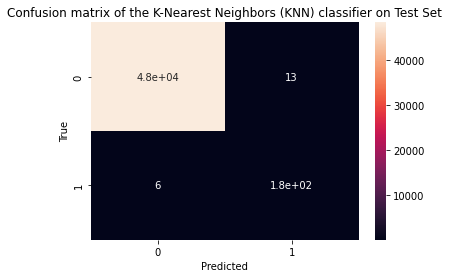

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("X_train.csv")

# Split data into 75% training and 25% test, stratify based on the target variable
X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop(['is_fraud'], axis=1),
    data['is_fraud'],
    test_size=0.1,#change to 0.25 for latest submission
    stratify=data['is_fraud'],  
    random_state=42
)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=1, n_jobs=-1)

# Perform cross-validation


f1_scorer = make_scorer(f1_score, average='micro')


cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=5, scoring=f1_scorer)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

knn_model.fit(X_train, Y_train)

# Evaluate KNN model on the test set
Y_test_predict = knn_model.predict(X_test)
print("\nK-Nearest Neighbors (KNN) on Test Set:")
print("Accuracy on test set =", accuracy_score(Y_test, Y_test_predict))
print("F1 score on test set =", f1_score(Y_test, Y_test_predict))

# Plot a confusion matrix for KNN on test set
cm_knn_test = confusion_matrix(Y_test, Y_test_predict)
sns.heatmap(cm_knn_test, annot=True)
plt.title('Confusion matrix of the K-Nearest Neighbors (KNN) classifier on Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [30]:
X_train

,Id,cc_num,category,job,state,merchant,gender,time_cluster,online,amt,median_trans_amt,city_pop,age,dist_merch_home,region
126875,122066,6.011600e+15,9,184,9,93,1,0,0,106.82,41.800,4138,51,80.307802,522
319018,218631,3.525670e+15,11,186,21,295,1,1,1,89.55,77.250,137,30,67.763875,474
432197,463217,4.683640e+12,6,48,17,187,1,1,0,74.98,75.600,1261,48,42.659076,404
330031,148094,3.521420e+15,5,190,14,624,0,1,0,33.32,52.360,910148,45,26.920786,278
17041,50716,4.561890e+12,11,187,14,372,0,0,1,4.83,47.265,78968,52,78.524993,784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244120,467344,4.464460e+12,7,445,8,234,0,1,0,214.22,33.590,217,30,135.866765,536
143584,75142,2.131120e+14,5,383,39,138,0,0,0,9.25,35.230,1523,36,55.779749,231
378643,30932,4.003770e+15,5,254,2,113,0,1,0,51.66,45.775,37,62,30.997634,880
253960,379070,4.607070e+15,2,21,35,389,0,0,0,39.70,33.380,1493,35,90.831975,164


## Convert Predictions to CSV for Kaggle

In [31]:
X_submission = pd.read_csv("X_test.csv")
X_submission_processed = X_submission._get_numeric_data().drop(columns=['is_fraud'])
print(X_submission_processed.columns)

X_submission['is_fraud'] = knn_model.predict(X_submission_processed)
X_submission.is_fraud = X_submission.is_fraud.astype(int)
submission = X_submission[['Id', 'is_fraud']]
submission.to_csv("submission.csv", index=False)

Index(['Id', 'cc_num', 'category', 'job', 'state', 'merchant', 'gender',
       'time_cluster', 'online', 'amt', 'median_trans_amt', 'city_pop', 'age',
       'dist_merch_home', 'region'],
      dtype='object')
